# Redes Neurais Artificiais
 **Nome: João Pedro Miranda Marques**
 
 **Matrícula: 2017050495** 

## K-means RBF

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Funções de treinamento e inferência da RBF

In [20]:
import numpy as np
from sklearn.cluster import KMeans

def trainRBF(xin, yin, p):

    # Função Radial Gaussiana
    def pdfnvar(x, m, K, n):
        if(n == 1):
            r = np.sqrt(int(K))
            px = (1/(np.sqrt(2*np.pi*r*r)))*np.exp(-0.5 * ((x-m)/(r))**2)
        else:
            px = ((1/np.sqrt((2*np.pi)**n * (np.linalg.det(K))))) * np.exp(-0.5*((x-m) @ (np.linalg.inv(K) @ np.transpose(x-m))))
        return px

    nSamples = xin.shape[0]     # Numero de amostras.
    nDimension = xin.shape[1]     # Dimensao de entrada.  

    xin = np.matrix(xin)  # garante que xin seja matriz
    yin = np.matrix(yin)  # garante que yin seja matriz

    #clusteriza os dados de entrada por meio do algorítmo K-médias
    xclust = KMeans(n_clusters=p).fit(xin)

    # Armazena vetores de centros das funções
    m = np.matrix(xclust.cluster_centers_)
    covlist = []
    
    # Estima matrizes de covarância para todos os centros
    for i in range(p):
        ici = np.where(xclust.labels_ == i)
        xci = xin[ici,]
        if nDimension == 1:
            covi = np.var(xci)
        else:
            covi = np.cov(xci[0], rowvar=False)
        covlist.append(covi)

    H =  np.zeros((nSamples, p))

    #calcula matriz H
    for j in range(nSamples):
        for i in range(p):
            mi = m[i,]
            covi = np.transpose(covlist[i]) + 0.001*np.identity(nDimension)
            aux = pdfnvar(xin[j,], mi, covi, nSamples)
            aux = np.asarray(aux)
            H[j][i] = aux[0]

    Haug = pd.DataFrame(H)
    Haug.insert(H.shape[1], H.shape[1], 1)
    Haug.to_numpy()

    W = (np.linalg.inv(Haug.T @ Haug) @ Haug.T) @ yin.T    # W<-( solve( t(Haug) %*% Haug) %*% t (Haug) ) %*% yin

    return [m, covlist, W, H]


In [26]:
# Calcula a saída da rede RBF
def YRBF(xin, modRBF):

    # Função Radial Gaussiana
    def pdfnvar(x, m, K, n):
        if(n == 1):
            r = np.sqrt(int(K))
            px = (1/(np.sqrt(2*np.pi*r*r)))*np.exp(-0.5 * ((x-m)/(r))**2)
        else:
            px = ((1/np.sqrt((2*np.pi)**n * (np.linalg.det(K))))) * np.exp(-0.5*((x-m) @ (np.linalg.inv(K) @ np.transpose(x-m))))
        return px

    nSamples = xin.shape[0]     # Numero de amostras.
    nDimension = xin.shape[1]     # Dimensao de entrada.  

    m = modRBF[0]
    covlist = modRBF[1]
    p = len(covlist) # Numero de funções radiais
    W = modRBF[2]

    H = np.zeros((nSamples, p))

    #calcula matriz H
    for j in range(nSamples):
        for i in range(p):
            mi = m[i,]
            covi = np.transpose(covlist[i]) + 0.001*np.identity(nDimension)
            aux = pdfnvar(xin[j,], mi, covi, nSamples)
            aux = np.asarray(aux)
            H[j][i] = aux[0]
    
    Haug = pd.DataFrame(H)
    Haug.insert(H.shape[1], H.shape[1], 1)
    Haug.to_numpy()

    Yhat = Haug @ W

    return Yhat

### Teste das funções RBF com base de dados Iris

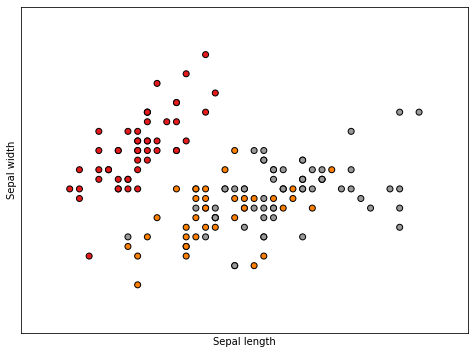

m:  [[5.99       2.81       4.53       1.45      ]
 [5.06923077 3.48461538 1.54615385 0.26923077]
 [5.45       2.4625     3.7875     1.1375    ]
 [6.62727273 3.02727273 4.62727273 1.45454545]
 [4.68       3.13       1.36       0.18      ]
 [5.56666667 3.95       1.48333333 0.31666667]]
covlist:  [array([[ 0.04766667, -0.03766667,  0.01255556, -0.00388889],
       [-0.03766667,  0.07877778, -0.00477778,  0.01277778],
       [ 0.01255556, -0.00477778,  0.07344444,  0.01388889],
       [-0.00388889,  0.01277778,  0.01388889,  0.02722222]]), array([[ 0.02564103,  0.00198718, -0.00679487,  0.00064103],
       [ 0.00198718,  0.01974359, -0.00923077,  0.00032051],
       [-0.00679487, -0.00923077,  0.02269231,  0.00237179],
       [ 0.00064103,  0.00032051,  0.00237179,  0.01064103]]), array([[ 0.14857143,  0.02642857,  0.085     , -0.00357143],
       [ 0.02642857,  0.08839286,  0.01375   ,  0.02589286],
       [ 0.085     ,  0.01375   ,  0.08125   ,  0.00910714],
       [-0.00357143,  0.025

/opt/homebrew/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [29]:

from sklearn import datasets

# import
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

xc1 = iris.data[:49,]
xc2 = iris.data[50:99,]

y1 = iris.target[:49,]
y2 = iris.target[50:99,]

# Plotting

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

plt.show()

# Selecionando 30 valores para treinamento
xcTrain1 = xc1[:29,]
xcTrain2 = xc2[:29,]
yTrain1 = y1[:29,]
yTrain2= y2[:29,]
xcTest1 = xc1[30:49,]
xcTest2 = xc2[30:49,]
yTest1 = y1[30:49,]
yTest2 = y2[30:49,]
yTest1 = pd.Series(yTest1)
yTest2 = pd.Series(yTest2)

# Treinamento
xcTrain = np.concatenate((xcTrain1, xcTrain2), axis=0)
yTrain = np.concatenate((yTrain1, yTrain2), axis=0)

retlist = trainRBF(xcTrain, yTrain, 6)

m = retlist[0]
covlist = retlist[1]
W = retlist[2]
H = retlist[3]

print("m: ", m)
print("covlist: ", covlist)
print("W: ", W)
print("H: ", H)

print("Vetor de pesos do Perceptron")
print("w: \n", W)

Yhat = YRBF(xcTrain, retlist)

print("Inferências")
print("Yhat: \n", Yhat)


### Exercicio

/opt/homebrew/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


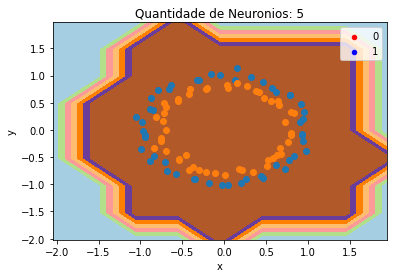

/opt/homebrew/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


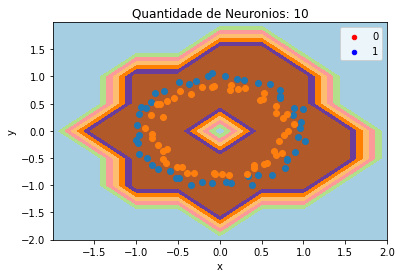

/opt/homebrew/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


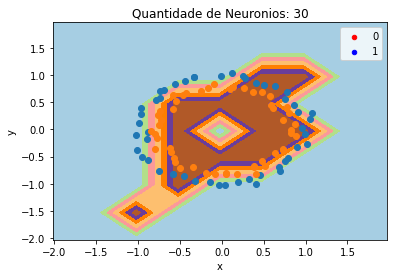

/opt/homebrew/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


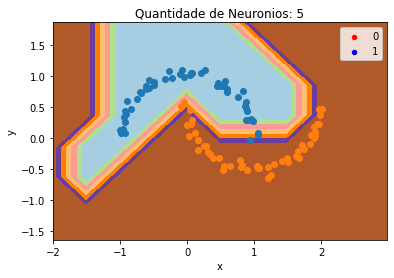

/opt/homebrew/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


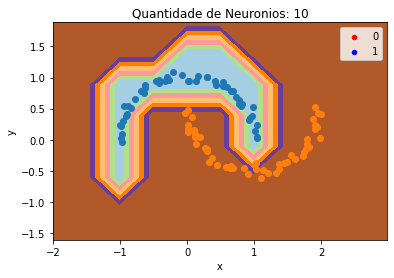

/opt/homebrew/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


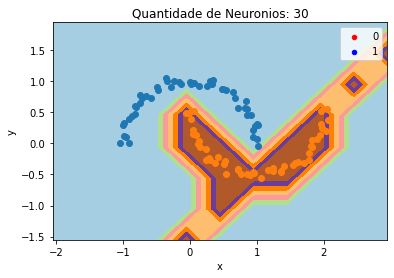

In [32]:
from sklearn.datasets import make_circles, make_moons, make_blobs
from matplotlib import pyplot
from pandas import DataFrame
from numpy import where
from numpy import meshgrid
from numpy import arange
from numpy import hstack

def plotContour(format, nClusters):
    if(format == 1):
        X, y = make_circles(n_samples=100, noise=0.05)
    elif(format == 2):
        X, y = make_moons(n_samples=100, noise=0.05)
    # scatter plot, dots colored by class value

    # define bounds of the domain
    min1, max1 = X[:, 0].min()-1, X[:, 0].max()+1
    min2, max2 = X[:, 1].min()-1, X[:, 1].max()+1
    # define the x and y scale
    x1grid = arange(min1, max1, 0.5)
    x2grid = arange(min2, max2, 0.5)
    # create all of the lines and rows of the grid
    xx, yy = meshgrid(x1grid, x2grid)
    # flatten each grid to a vector
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
    # horizontal stack vectors to create x1,x2 input for the model
    grid = hstack((r1,r2))

    df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
    colors = {0:'red', 1:'blue'}
    fig, ax = pyplot.subplots()
    grouped = df.groupby('label')
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])

    retlist = trainRBF(X[:,:2], y, nClusters)

    m = retlist[0]
    covlist = retlist[1]
    W = retlist[2]
    H = retlist[3]

    #plotting contours
    # Make prediction from training process
    yhat = YRBF(grid, retlist)
    yhat = (yhat > 0.5).astype(int)
    yhat = pd.DataFrame(yhat).to_numpy()

    # reshape the predictions back into a grid
    zz = yhat.reshape(xx.shape)
    # plot the grid of x, y and z values as a surface
    pyplot.contourf(xx, yy, zz, cmap='Paired')
    # create scatter plot for samples from each class
    for class_value in range(2):
        # get row indexes for samples with this class
        row_ix = where(y == class_value)
        # create scatter of these samples
        pyplot.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')
    # show the plot
    if(nClusters == 5):
        plt.title('Quantidade de Neuronios: 5')
    elif(nClusters == 10):
        plt.title('Quantidade de Neuronios: 10')
    elif(nClusters == 30):
        plt.title('Quantidade de Neuronios: 30')
    pyplot.show()

plotContour(1,5)
plotContour(1,10)
plotContour(1,30)
plotContour(2,5)
plotContour(2,10)
plotContour(2,30)

